In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

sys.path.append('/Users/alexanderantonakis/Desktop/Software/CEvNS_RATES/Classes')
from snsgen import SNSGen

print("Finished importing")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Finished importing


# Initialize the SNS Generator for Ar40: 1 Ton, 20 m Baseline

In [2]:
# initialize the SNS generator with the material of choice

mdet = 1000 #kg
L = 20. # meters
pot = 2.1*(10**23)
material = "He"

gen = SNSGen(mdet, L, pot, material)

print("Set up the SNS generator for our config")

Set up the SNS generator for our config


# Spectral Functions for the Neutrino Flux

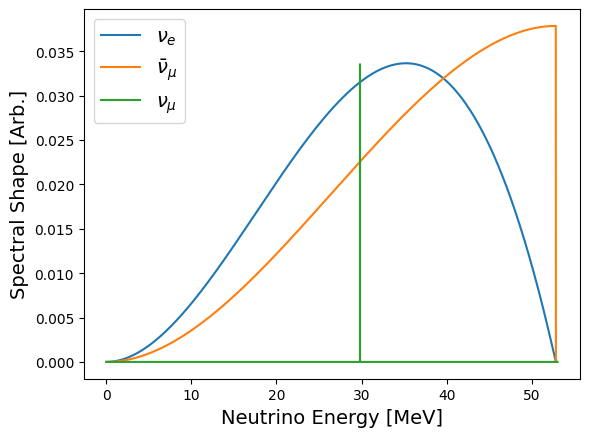

In [3]:
Es = np.arange(0, 53, 0.001)
s_nue = gen.spectral_nue(Es)
s_numubar = gen.spectral_numubar(Es)
s_numu = gen.spectral_numu(Es)
plt.plot(Es, s_nue, label=r"$\nu_{e}$")
plt.plot(Es, s_numubar, label=r"$\bar{\nu}_{\mu}$")
plt.plot(Es, s_numu, label=r"$\nu_{\mu}$")
plt.legend(fontsize=14)
plt.xlabel("Neutrino Energy [MeV]", fontsize=14)
plt.ylabel("Spectral Shape [Arb.]", fontsize=14)
plt.show()

# Calculate the normalized flux / POT

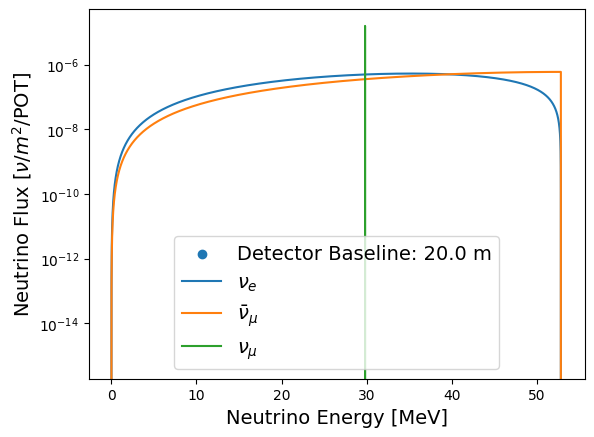

In [4]:
f_nue = gen.flux_nue(Es)
f_numubar = gen.flux_numubar(Es)
f_numu = gen.flux_numu(Es)
plt.scatter([], [], label="Detector Baseline: " + str(gen.L)+" m")
plt.plot(Es, f_nue, label=r"$\nu_{e}$")
plt.plot(Es, f_numubar, label=r"$\bar{\nu}_{\mu}$")
plt.plot(Es, f_numu, label=r"$\nu_{\mu}$")
plt.legend(fontsize=14)
plt.xlabel("Neutrino Energy [MeV]", fontsize=14)
plt.ylabel("Neutrino Flux [" + r"$\nu$"+"/"+"$m^2$"+"/POT]", fontsize=14)
plt.yscale("log")
plt.show()

# Plot the Helm Form Factor used in the Cross-section

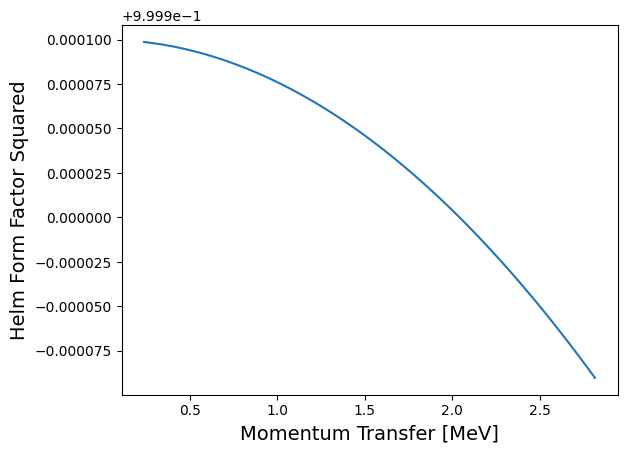

In [5]:
Es = np.arange(0.001, 0.14+0.001, 0.001)
qs = np.sqrt(2*gen.M*Es)
fs = gen.FH(Es)**2
plt.plot(qs, fs)
plt.xlabel("Momentum Transfer [MeV]", fontsize=14)
plt.ylabel(r"Helm Form Factor Squared", fontsize=14)
plt.show()

# Calculate the Cross-section using the Differential Cross-section

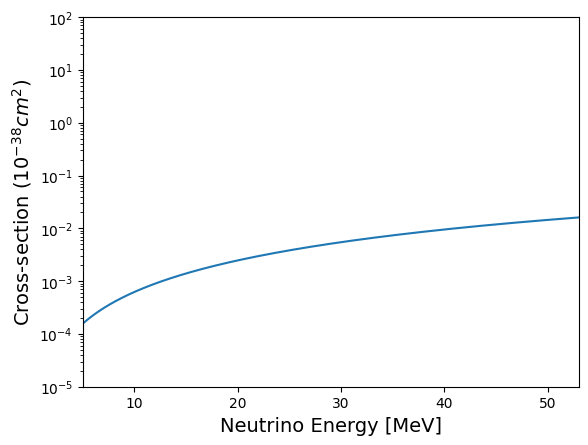

In [6]:
Enus = np.linspace(0.00001, 53, 1000)
sigmas = gen.Sigma(Enus)


plt.plot(Enus, sigmas*(100**2)*(10**38))
plt.xlim([5, 53])
plt.ylim([10**(-5), 10**2])
plt.yscale("log")
plt.ylabel("Cross-section ("+r"$10^{-38} cm^2$"+")", fontsize=14)
plt.xlabel("Neutrino Energy [MeV]", fontsize=14)
plt.show()

# Event Rate as a function of Recoil Energy

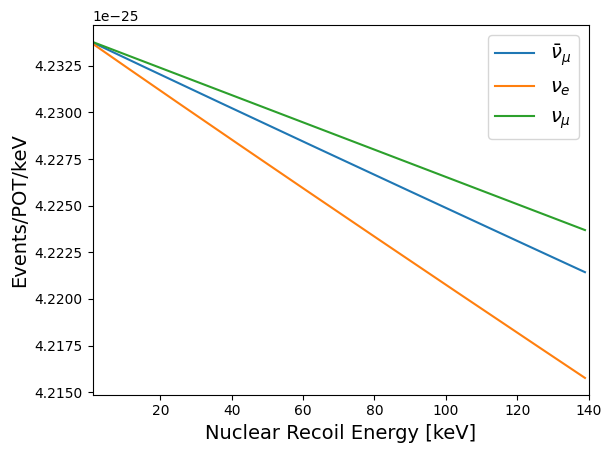

In [7]:
Ers = np.arange(0.001, 0.14, 0.001)
plt.plot(Ers*1000, gen.N_Er_numubar(Ers), label=r"$\bar{\nu}_{\mu}$")
plt.plot(Ers*1000, gen.N_Er_nue(Ers), label=r"$\nu_{e}$")
plt.plot(Ers*1000, gen.N_Er_numu(Ers), label=r"$\nu_{\mu}$")
plt.ylabel("Events/POT/keV", fontsize=14)
plt.xlabel("Nuclear Recoil Energy [keV]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim([1, 140])
#plt.ylim([0, 350])
plt.show()

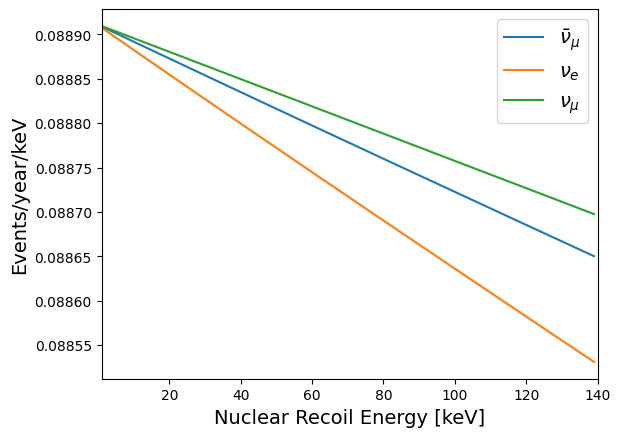

In [23]:
Ers = np.arange(0.001, 0.14, 0.001)
plt.plot(Ers*1000, gen.pot*gen.N_Er_numubar(Ers), label=r"$\bar{\nu}_{\mu}$")
plt.plot(Ers*1000, gen.pot*gen.N_Er_nue(Ers), label=r"$\nu_{e}$")
plt.plot(Ers*1000, gen.pot*gen.N_Er_numu(Ers), label=r"$\nu_{\mu}$")
plt.ylabel("Events/year/keV", fontsize=14)
plt.xlabel("Nuclear Recoil Energy [keV]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim([1, 140])
#plt.ylim([0, 350])
plt.show()

# Plot the Differential Recoil Spectrum / POT

/var/folders/9m/v31p0fm512g94z84wccvp5y40000gn/T/ipykernel_82253/3812019110.py:19: UserWarning: Log scale: values of z <= 0 have been masked
  contour = plt.contourf(X*1000, Y, Z, levels=100,


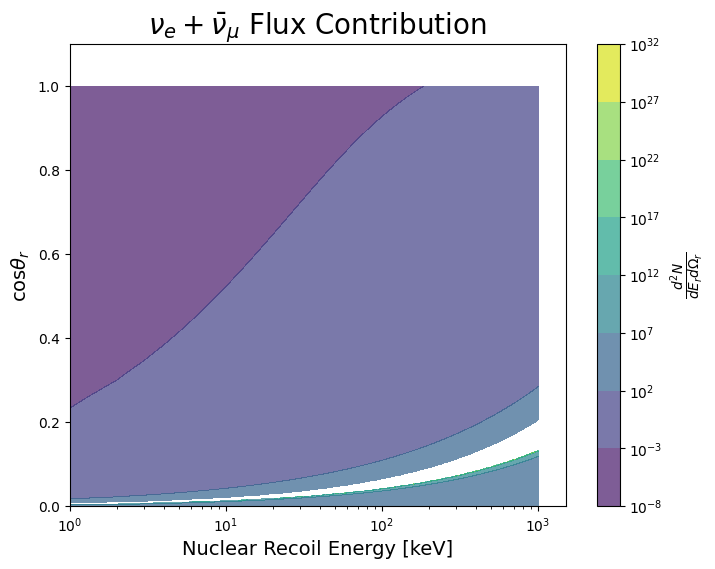

In [26]:

dx = 0.001
dy = 0.001

Ers = np.arange(dx, 1 + dx, dx)
costhetas = np.arange(dy, 1 + dy, dy)


X, Y = np.meshgrid(Ers, costhetas)  
Z = gen.dN_dEr_dcos_muon(X, Y)*gen.pot

# Create a contour plot
plt.figure(figsize=(8, 6))

# Contour lines
#contour = plt.contour(X*1000, Y, Z, levels=100, cmap="viridis", norm=LogNorm())  # 20 levels
#plt.clabel(contour, inline=True, fontsize=8)               # Label the contours

# Filled contour
contour = plt.contourf(X*1000, Y, Z, levels=100, 
                       cmap="viridis", alpha=0.7, norm=LogNorm())  # Filled contours

colorbar = plt.colorbar(contour)
colorbar.set_label(r"$\frac{d^{2}N}{dE_{r}d\Omega_{r}}$", fontsize=14)

plt.scatter([], [], c="black", label="Detector Mass: "+str(gen.mdet)+ " kg")
plt.scatter([], [], c="black", label="Baseline: "+str(gen.L)+ " m")

#plt.xlim([0, 150])
plt.ylim([0, 1.1])
# Add labels
#plt.title("Contour Plot Example")
plt.xlabel("Nuclear Recoil Energy [keV]", fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
plt.xscale("log")
# Show the plot
plt.xlim([1, 1500])
#plt.legend(loc="lower right")
plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=20)
plt.show()

/var/folders/9m/v31p0fm512g94z84wccvp5y40000gn/T/ipykernel_82253/2281894087.py:9: UserWarning: Log scale: values of z <= 0 have been masked
  contour = plt.contourf(X*1000, Y, integral_approx, levels=1000,


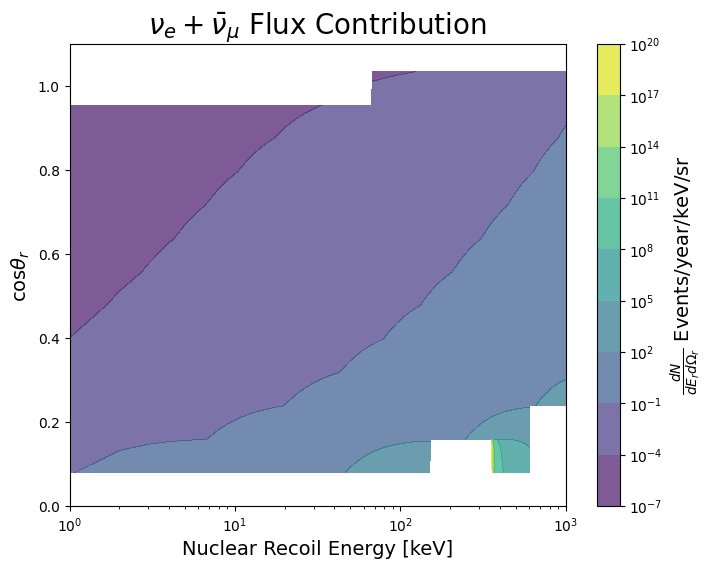

In [17]:
from scipy.ndimage import gaussian_filter

integral_approx = gaussian_filter(Z, sigma=(dx/2, dy/2))

# Create a contour plot
plt.figure(figsize=(8, 6))

# Filled contour
contour = plt.contourf(X*1000, Y, integral_approx, levels=1000, 
                       cmap="viridis", alpha=0.7, norm=LogNorm())  # Filled contours

# Add a colorbar
#plt.colorbar(label=r"$\frac{dN}{dE_{r}d\Omega_{r}}$", labelsize=14)
colorbar = plt.colorbar(contour)
colorbar.set_label(r"$\frac{dN}{dE_{r}d\Omega_{r}}$"+" Events/year/keV/sr", fontsize=14)

plt.scatter([], [], c="black", label="Detector Mass: "+str(mdet)+ " kg")
plt.scatter([], [], c="black", label="Baseline: "+str(L)+ " m")
#plt.plot([1, 200], [1/(4*math.pi), 1/(4*math.pi)], c="r")
#plt.xlim([0, 150])
plt.ylim([0, 1.1])
# Add labels
#plt.title("Contour Plot Example")
plt.xlabel("Nuclear Recoil Energy [keV]", fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
plt.xscale("log")
# Show the plot
plt.xlim([1, 1000])
#plt.legend(loc="lower right")
plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=20)
plt.show()

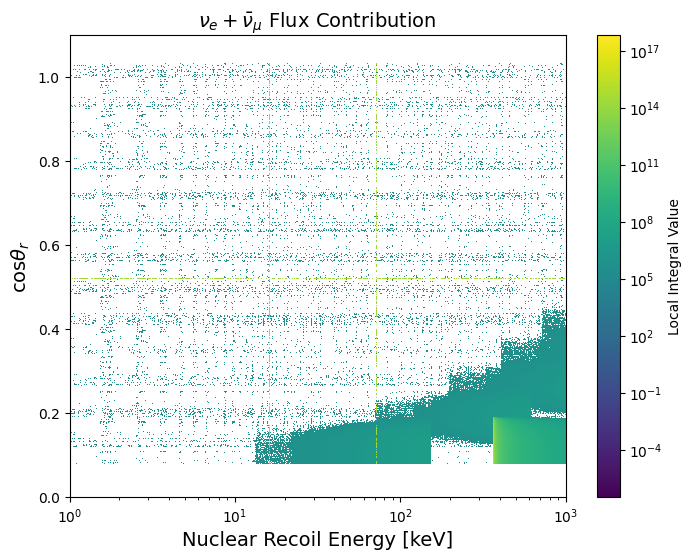

In [20]:
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(
    integral_approx, 
    extent=(Ers.min()*1000, Ers.max()*1000, costhetas.min(), costhetas.max()),  # Set the axes to match the meshgrid
    origin='lower',  # Place the (0, 0) in the lower-left
    aspect='auto',   # Adjust aspect ratio
    cmap='viridis',   # Color map
    norm=LogNorm() 
)
plt.colorbar(heatmap, label='Local Integral Value')  # Add a colorbar
plt.xlabel('Nuclear Recoil Energy [keV]', fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=14)
plt.xscale("log")
plt.xlim([1, 1000])
plt.ylim([0.0, 1.1])
plt.show()

In [19]:
print(len(Ers)*len(costhetas))

13000


/Users/alexanderantonakis/opt/anaconda3/envs/pyROOT_3.9_env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/alexanderantonakis/opt/anaconda3/envs/pyROOT_3.9_env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/alexanderantonakis/opt/anaconda3/envs/pyROOT_3.9_env/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  quad_r = quad(f, low, high, a

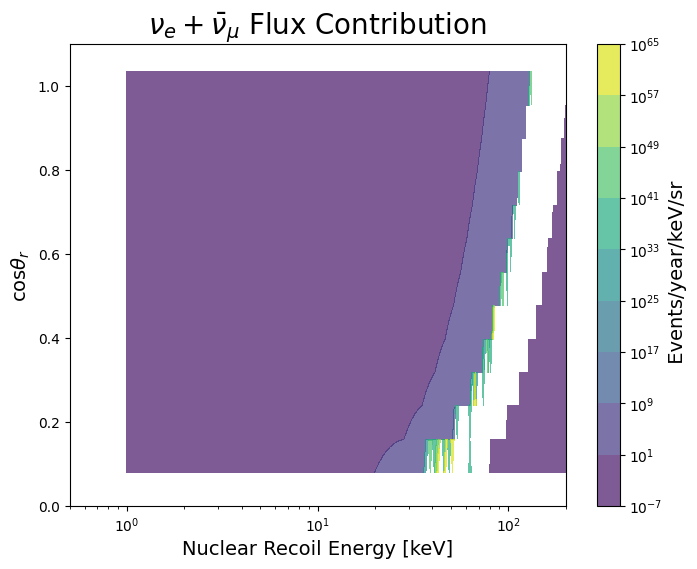

In [22]:
from scipy.integrate import dblquad

def Integrand(Er, costhetar):
    a = gen.dN_dEr_dcos_muon(Er, costhetar)*gen.pot
    b = 2*math.pi
    return a*b    

dx = 0.001
dy = 1/(4*math.pi)

Ers = np.arange(dx, 1 + dx, dx)
costhetas = np.arange(dy, 1 + dy, dy)


X, Y = np.meshgrid(Ers, costhetas) 
local_integrals = np.zeros_like(X)


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_center = X[i, j]
        y_center = Y[i, j]
        
        # Perform local integration around (x_center, y_center)
        integral, _ = dblquad(
            Integrand,
            x_center, x_center + dx,   # y-range
            y_center,       # x lower bound
            y_center + dy        # x upper bound    
        )
        local_integrals[i, j] = integral

# Create a contour plot
plt.figure(figsize=(8, 6))

# Filled contour
contour = plt.contourf(X*1000, Y, local_integrals, levels=100, 
                       cmap="viridis", alpha=0.7, norm=LogNorm())  # Filled contours

# Add a colorbar
#plt.colorbar(label=r"$\frac{dN}{dE_{r}d\Omega_{r}}$", labelsize=14)
colorbar = plt.colorbar(contour)
colorbar.set_label(" Events/year/keV/sr", fontsize=14)

plt.scatter([], [], c="black", label="Detector Mass: "+str(mdet)+ " kg")
plt.scatter([], [], c="black", label="Baseline: "+str(L)+ " m")

#plt.xlim([0, 150])
plt.ylim([0, 1.1])
# Add labels
#plt.title("Contour Plot Example")
plt.xlabel("Nuclear Recoil Energy [keV]", fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
plt.xscale("log")
# Show the plot
plt.xlim([0.5, 200])
#plt.legend(loc="lower right")
plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=20)
plt.show()

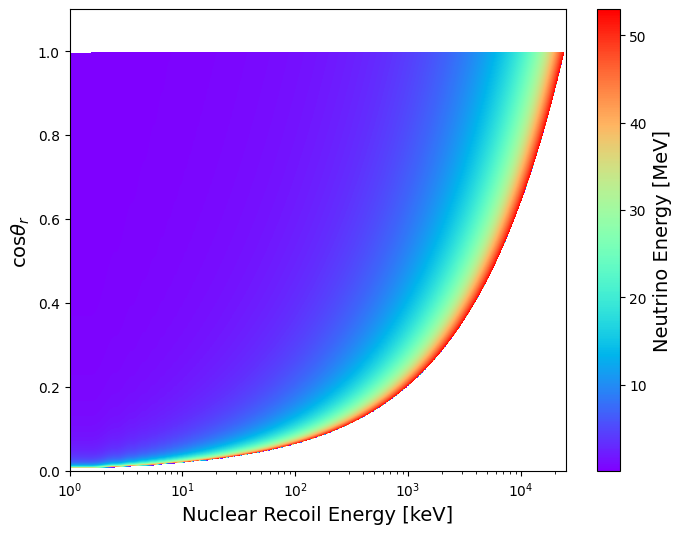

0.0


In [63]:
# test the kinematics

def mask_space(Er, costhetar):
    e = gen.epsilon(Er, costhetar)
    Emin = gen.get_nu_min_energy(Er)
    e[(e > 53)] = 0
    e[(e < Emin)] = 0
    return e

dx = 0.001
dy = 0.001

Ers = np.arange(dx, 25 + dx, dx)
costhetas = np.arange(dy, 1 + dy, dy)


X, Y = np.meshgrid(Ers, costhetas) 

Z = mask_space(X, Y)

Z[(Z < 0)] = 0
Z[(Z > 53)] = 0

cmap = plt.colormaps['rainbow'].copy()  # Copy the colormap to modify it
cmap.set_under(color='white') 

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(
    Z, 
    extent=(Ers.min()*1000, Ers.max()*1000, costhetas.min(), costhetas.max()),  # Set the axes to match the meshgrid
    origin='lower',  # Place the (0, 0) in the lower-left
    aspect='auto',   # Adjust aspect ratio
    cmap=cmap,   # Color map   
    vmin=0.12,
    #norm=LogNorm(vmin=0.12, vmax=53)
)
colorbar = plt.colorbar(heatmap)  # Add a colorbar
colorbar.set_label("Neutrino Energy [MeV]", fontsize=14)
plt.xlabel('Nuclear Recoil Energy [keV]', fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
#plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=14)
plt.xscale("log")
plt.xlim([1, 25000])
plt.ylim([0.0, 1.1])
plt.show()

print(np.min(Z))

In [48]:
print(gen.get_nu_min_energy(0.001))

0.11895377253370319


/var/folders/9m/v31p0fm512g94z84wccvp5y40000gn/T/ipykernel_82253/3999546577.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  contour = plt.contourf(X*1000, Y, Z2, levels=100,


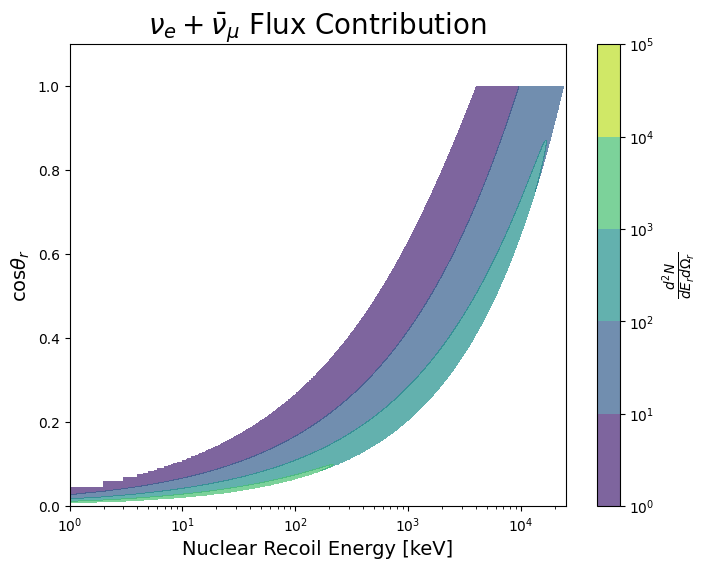

In [67]:
Z[(Z >= 0.12)] = 1
Z[(Z < 0.12)] = 0

Z2 = gen.dN_dEr_dcos_muon(X, Y)*gen.pot*Z
Z2[(Z2 < 1)] = 0

# Create a contour plot
plt.figure(figsize=(8, 6))

# Contour lines
#contour = plt.contour(X*1000, Y, Z, levels=100, cmap="viridis", norm=LogNorm())  # 20 levels
#plt.clabel(contour, inline=True, fontsize=8)               # Label the contours

# Filled contour
contour = plt.contourf(X*1000, Y, Z2, levels=100, 
                       cmap="viridis", alpha=0.7, norm=LogNorm())  # Filled contours

colorbar = plt.colorbar(contour)
colorbar.set_label(r"$\frac{d^{2}N}{dE_{r}d\Omega_{r}}$", fontsize=14)

plt.scatter([], [], c="black", label="Detector Mass: "+str(gen.mdet)+ " kg")
plt.scatter([], [], c="black", label="Baseline: "+str(gen.L)+ " m")

#plt.xlim([0, 150])
plt.ylim([0, 1.1])
# Add labels
#plt.title("Contour Plot Example")
plt.xlabel("Nuclear Recoil Energy [keV]", fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
plt.xscale("log")
# Show the plot
plt.xlim([1, 25000])
#plt.legend(loc="lower right")
plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=20)
plt.show()

In [81]:
# Try to get the 2D rates by integrating 

def N_2D_muon(Ers, costhetars):

    dx = (Ers[0][1] - Ers[0][0])
    dy = (costhetars[1][0] - costhetars[0][0])
    print("dx", dx)
    print("dy", dy)
    
    def integrand(Er, costhetar):
        return 2*math.pi*gen.dN_dEr_dcos_muon(Er, costhetar)
        

    integrals = np.zeros_like(Ers)
    count = 0
    for i in range(Ers.shape[0]):
        for j in range(Ers.shape[1]):
            y_center = Ers[i, j]
            x_center = costhetars[i, j] # Double Quad Notation is inverted
            integral, _ = dblquad(
                integrand,
                x_center + dx, 
                x_center, 
                y_center,   
                y_center + dy,       
                          
            )
            integrals[i, j] = integral
            if count % 1000 == 0:
                print("Finished iteration ", count)
                
            count += 1
            
    return integrals



dx = 0.1
dy = 0.1

Ers = np.arange(dx, 25 + dx, dx)
costhetas = np.arange(dy, 1, dy)

X, Y = np.meshgrid(Ers, costhetas) 


N = N_2D_muon(X, Y)*gen.pot


print("Done")

dx 0.1
dy 0.1
Finished iteration  0
Finished iteration  1000
Finished iteration  2000
Done


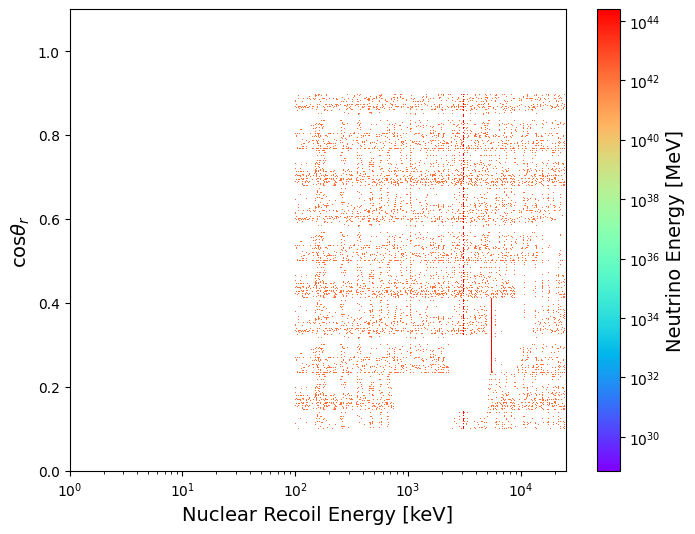

In [82]:
cmap = plt.colormaps['rainbow'].copy()  # Copy the colormap to modify it
cmap.set_under(color='white') 

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(
    N, 
    extent=(Ers.min()*1000, Ers.max()*1000, costhetas.min(), costhetas.max()),  # Set the axes to match the meshgrid
    origin='lower',  # Place the (0, 0) in the lower-left
    aspect='auto',   # Adjust aspect ratio
    cmap=cmap,   # Color map   
    #vmin=0.00001,
    norm=LogNorm()
)
colorbar = plt.colorbar(heatmap)  # Add a colorbar
colorbar.set_label("Neutrino Energy [MeV]", fontsize=14)
plt.xlabel('Nuclear Recoil Energy [keV]', fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
#plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=14)
plt.xscale("log")
plt.xlim([1, 25000])
plt.ylim([0.0, 1.1])
plt.show()

#print(np.min(Z))

/var/folders/9m/v31p0fm512g94z84wccvp5y40000gn/T/ipykernel_82253/1140250428.py:5: UserWarning: Log scale: values of z <= 0 have been masked
  contour = plt.contourf(X*1000, Y, N, levels=100,


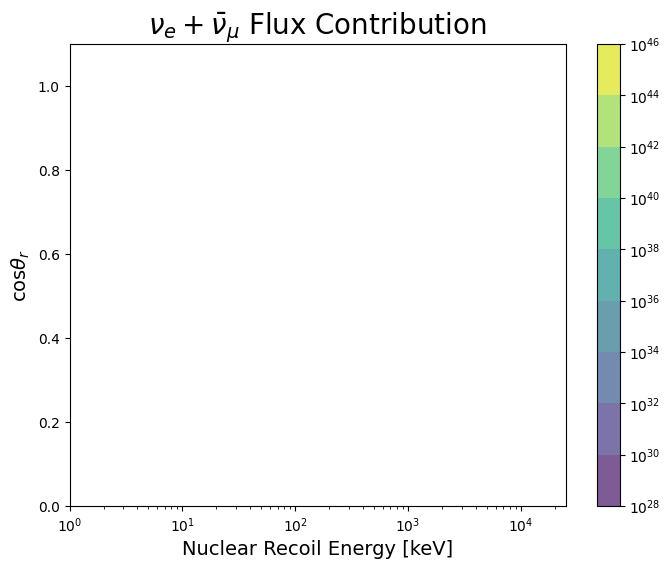

In [85]:
# Create a contour plot
plt.figure(figsize=(8, 6))

# Filled contour
contour = plt.contourf(X*1000, Y, N, levels=100, 
                       cmap="viridis", alpha=0.7, norm=LogNorm())  # Filled contours

colorbar = plt.colorbar(contour)
#colorbar.set_label(r"$\frac{d^{2}N}{dE_{r}d\Omega_{r}}$", fontsize=14)

#plt.scatter([], [], c="black", label="Detector Mass: "+str(gen.mdet)+ " kg")
#plt.scatter([], [], c="black", label="Baseline: "+str(gen.L)+ " m")

#plt.xlim([0, 150])
plt.ylim([0, 1.1])
# Add labels
#plt.title("Contour Plot Example")
plt.xlabel("Nuclear Recoil Energy [keV]", fontsize=14)
plt.ylabel("cos"+r"$\theta_{r}$", fontsize=14)
plt.xscale("log")
# Show the plot
plt.xlim([1, 25000])
#plt.legend(loc="lower right")
plt.title(r"$\nu_{e} + \bar{\nu}_{\mu}$"+" Flux Contribution", fontsize=20)
plt.show()

In [86]:
import ROOT

h_N_2D = ROOT.TH2D("h_N_2D", "", len(Ers), dx, 25, len(costhetas), dy, 1)

for i in range(len(Ers)):
    for j in range(len(costhetas)):
        if N[i, j] > 0:
            h_N_2D.SetBinContent(i+1, j+1, N[i, j])

c = ROOT.TCanvas("c", "c", 700, 500)

h_N_2D.Draw("Colz")

c.Draw()

ModuleNotFoundError: No module named 'ROOT'